# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')


# Load data

In [2]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\IITK-Assignments\sales Analysis\AusApparalSales4thQrt2020.csv")
df = pd.read_csv(file_path)
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


# Understanding of data

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [42]:
df.shape

(7560, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [8]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [17]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols.columns

Index(['Date', 'Time', 'State', 'Group'], dtype='object')

In [19]:
numerical_cols = df.select_dtypes(include=['int64','float64'])
numerical_cols.columns

Index(['Unit', 'Sales'], dtype='object')

In [47]:
cols = ['time', 'state', 'group']

for i in cols:
    print(f"{i} : {df[i].unique()}")

time : [' Morning' ' Afternoon' ' Evening']
state : [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
group : [' Kids' ' Men' ' Women' ' Seniors']


In [48]:
cols = ['time', 'state', 'group']

for i in cols:
    print(f"{i} : {df[i].nunique()}")

time : 3
state : 7
group : 4


In [38]:
df.columns = df.columns.str.lower()

In [51]:
for i in cols:
    print(f"{i} : {df[i].value_counts()} \n")

time : time
 Morning      2520
 Afternoon    2520
 Evening      2520
Name: count, dtype: int64 

state : state
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: count, dtype: int64 

group : group
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: count, dtype: int64 



# Understanding data distribution for numerical cols

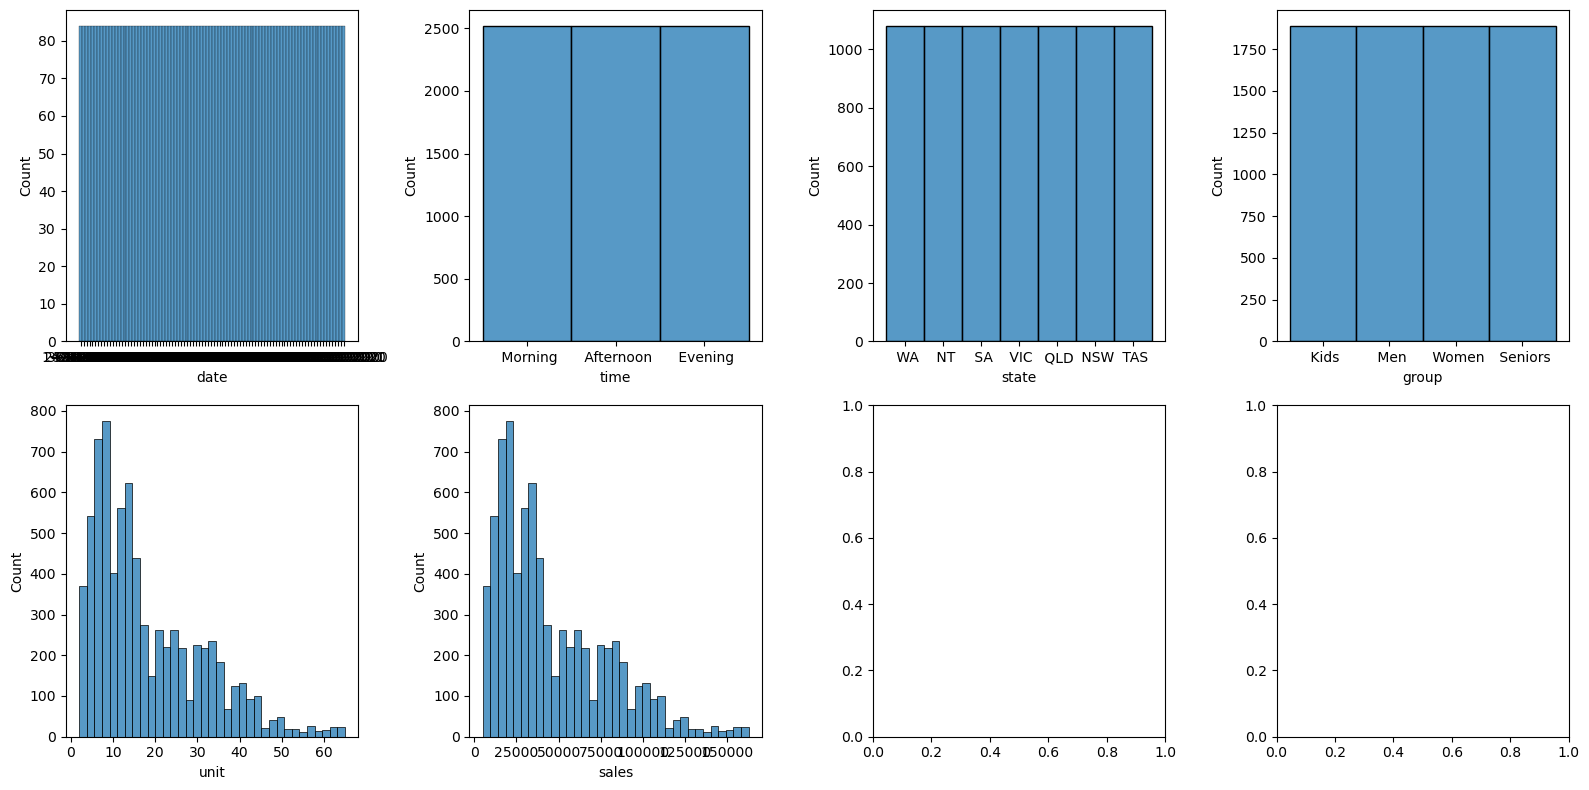

In [76]:
fig, axes = plt.subplots(2,4,figsize=(16,8))
axes = axes.flatten()

for axes, cols in zip(axes,df.columns):
    sns.histplot(df, x = cols, ax = axes)

plt.tight_layout()
plt.show()

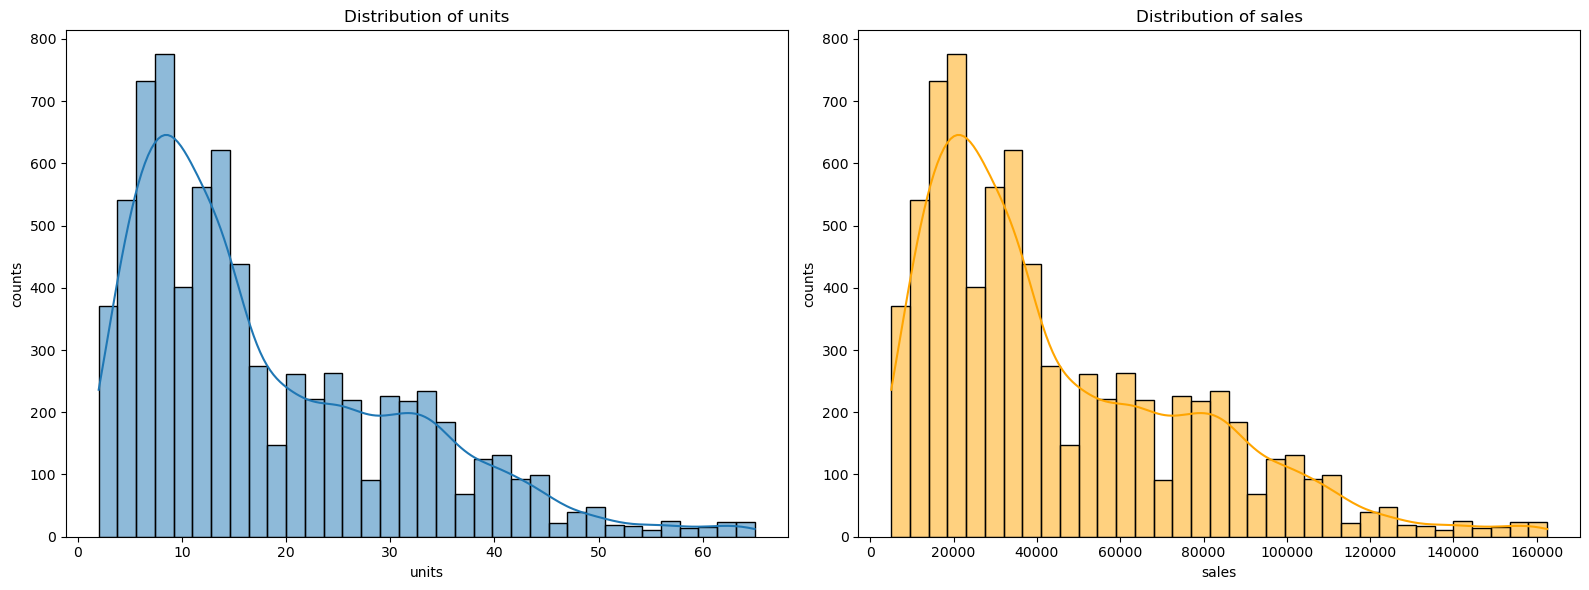

In [77]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(data = df, x = 'unit',kde = True)
plt.title('Distribution of units')
plt.xlabel('units')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.histplot(data = df, x = 'sales',kde = True, color = 'Orange')
plt.title('Distribution of sales')
plt.xlabel('sales')
plt.ylabel('counts')

plt.tight_layout()
plt.show()

# Feature addition/removal

In [108]:
df['new_date'] = pd.to_datetime(df['date'], format = '%d-%b-%Y')

In [111]:
df['year'] = df['new_date'].dt.year

# df['year'] = df['date'].apply(lambda x: x[-4:])

In [115]:
df['month'] = df['new_date'].dt.month

# df['month'] = df['date'].apply(lambda x: x[-8:][:3])

In [116]:
df['month_name'] = df['new_date'].dt.month_name()

In [129]:
df['day_name'] = df['new_date'].dt.day_name()

In [152]:
def get_weekend(day_name):
    if day_name == 'Sunday' or day_name == 'Saturday':
        return "Weekend"
    else:
        return "Weekday"

In [155]:
df['Weekday(y/n)'] = df['day_name'].apply(lambda x: get_weekend(x))

In [171]:
df

,date,time,state,group,unit,sales,year,month,new_date,month_name,day_name,Weekday(y/n)
0,1-Oct-2020,Morning,WA,Kids,8,20000,2020,10,2020-10-01,October,Thursday,Weekday
1,1-Oct-2020,Morning,WA,Men,8,20000,2020,10,2020-10-01,October,Thursday,Weekday
2,1-Oct-2020,Morning,WA,Women,4,10000,2020,10,2020-10-01,October,Thursday,Weekday
3,1-Oct-2020,Morning,WA,Seniors,15,37500,2020,10,2020-10-01,October,Thursday,Weekday
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,2020,10,2020-10-01,October,Thursday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,2020,12,2020-12-30,December,Wednesday,Weekday
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,2020,12,2020-12-30,December,Wednesday,Weekday
7557,30-Dec-2020,Evening,TAS,Men,15,37500,2020,12,2020-12-30,December,Wednesday,Weekday
7558,30-Dec-2020,Evening,TAS,Women,11,27500,2020,12,2020-12-30,December,Wednesday,Weekday


In [172]:
df1 = df.copy(deep=True)
df1

,date,time,state,group,unit,sales,year,month,new_date,month_name,day_name,Weekday(y/n)
0,1-Oct-2020,Morning,WA,Kids,8,20000,2020,10,2020-10-01,October,Thursday,Weekday
1,1-Oct-2020,Morning,WA,Men,8,20000,2020,10,2020-10-01,October,Thursday,Weekday
2,1-Oct-2020,Morning,WA,Women,4,10000,2020,10,2020-10-01,October,Thursday,Weekday
3,1-Oct-2020,Morning,WA,Seniors,15,37500,2020,10,2020-10-01,October,Thursday,Weekday
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,2020,10,2020-10-01,October,Thursday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,2020,12,2020-12-30,December,Wednesday,Weekday
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,2020,12,2020-12-30,December,Wednesday,Weekday
7557,30-Dec-2020,Evening,TAS,Men,15,37500,2020,12,2020-12-30,December,Wednesday,Weekday
7558,30-Dec-2020,Evening,TAS,Women,11,27500,2020,12,2020-12-30,December,Wednesday,Weekday


# Data visualization

In [173]:
df1.columns

Index(['date', 'time', 'state', 'group', 'unit', 'sales', 'year', 'month',
       'new_date', 'month_name', 'day_name', 'Weekday(y/n)'],
      dtype='object')

In [183]:
cols_to_use = ['time', 'state', 'group','month_name', 'day_name', 'Weekday(y/n)']

for i in cols_to_use:
    print(i)

time
state
group
month_name
day_name
Weekday(y/n)


## Categorical features with sales

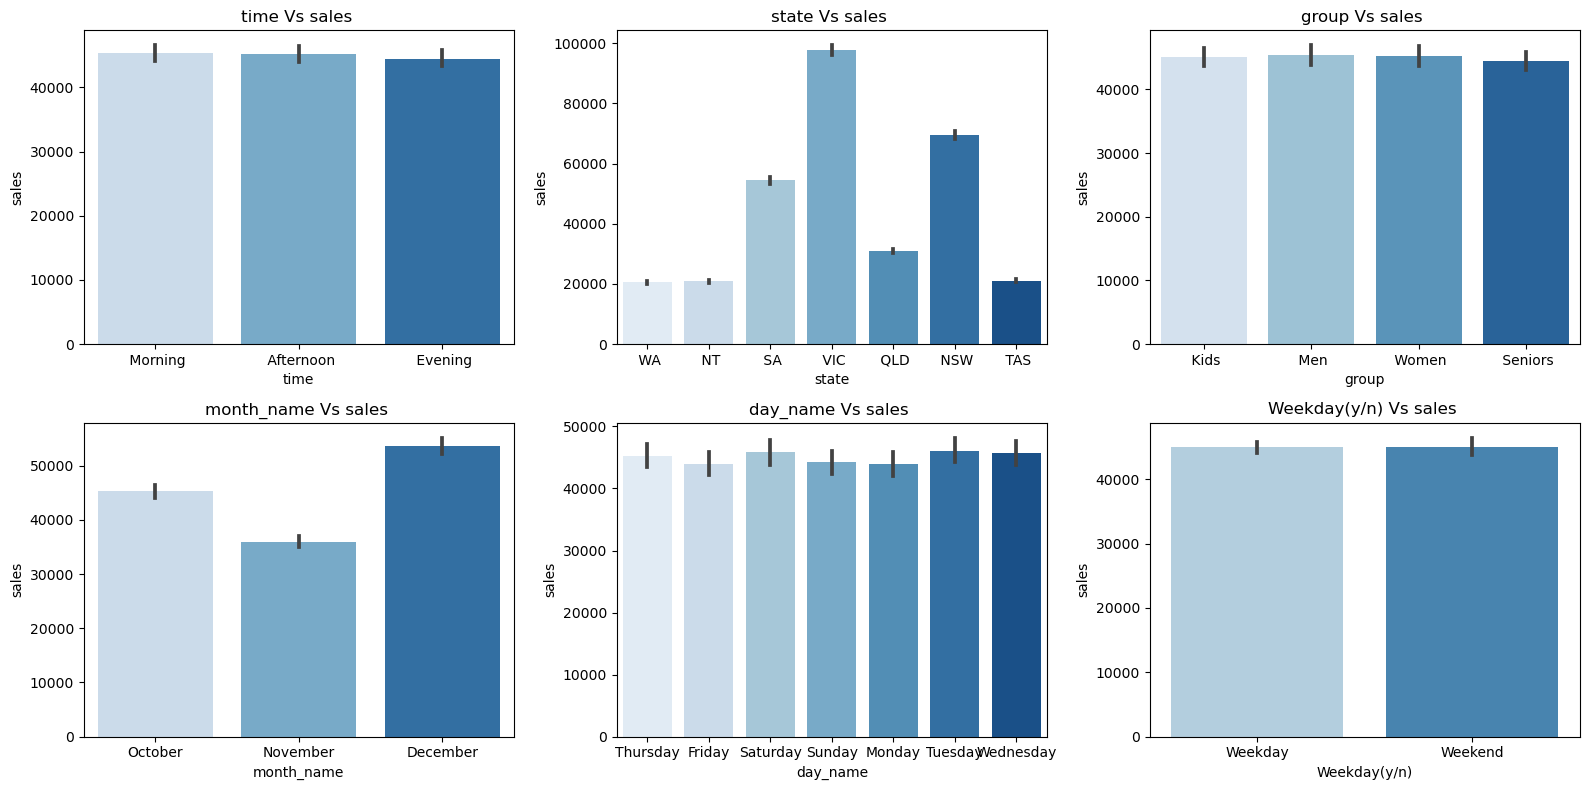

In [198]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
axes = axes.flatten()

for axes,cols in zip(axes,cols_to_use):
    sns.barplot(data = df1, x = cols, y = 'sales', ax = axes, palette  = "Blues", )
    axes.set_title(f"{cols} Vs sales ")

plt.tight_layout()
plt.show()

## Categorical features with volume

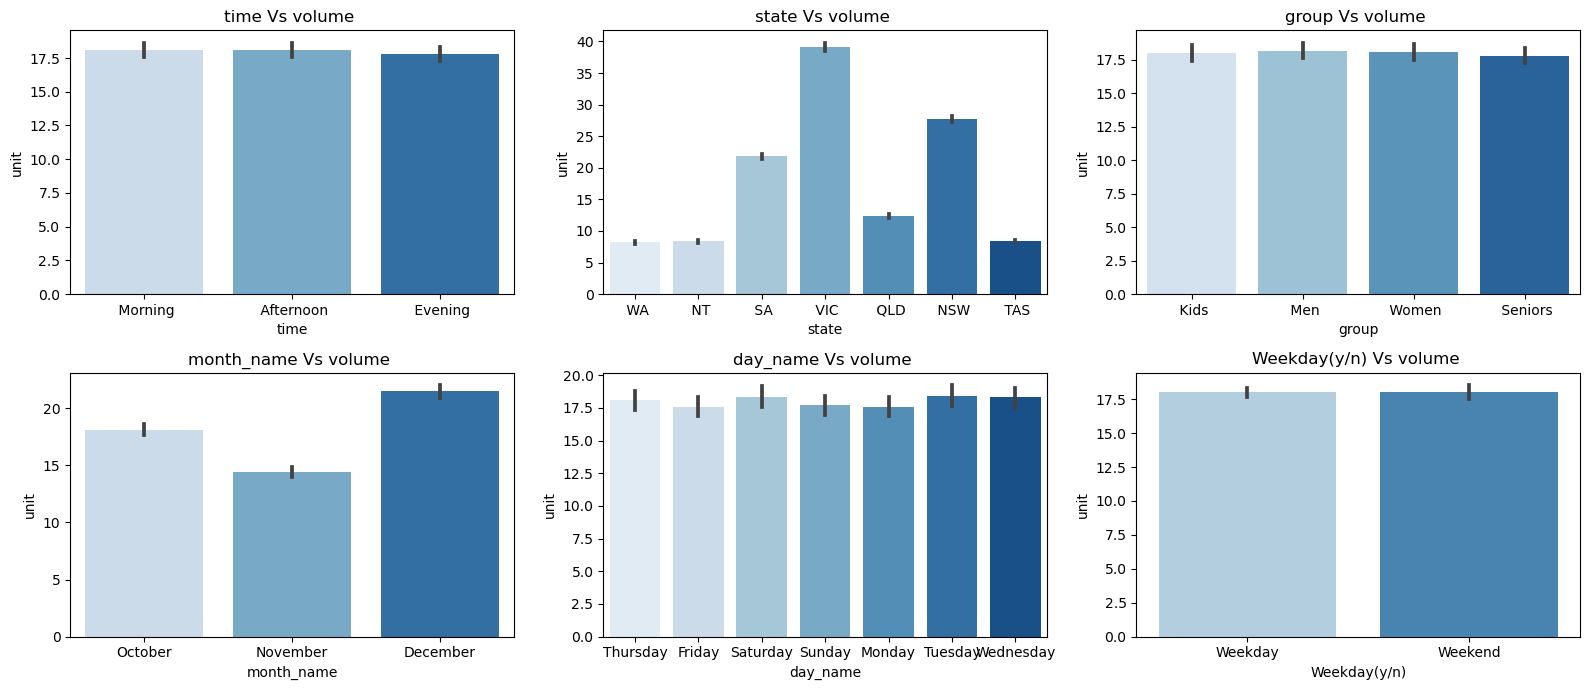

In [259]:
fig, axes = plt.subplots(2,3, figsize=(16,7))
axes = axes.flatten()

for axes,cols in zip(axes,cols_to_use):
    sns.barplot(data = df1, x = cols, y = 'unit', ax = axes, palette  = "Blues", )
    axes.set_title(f"{cols} Vs volume ")

plt.tight_layout()
plt.show()

## Categorical to Categorical

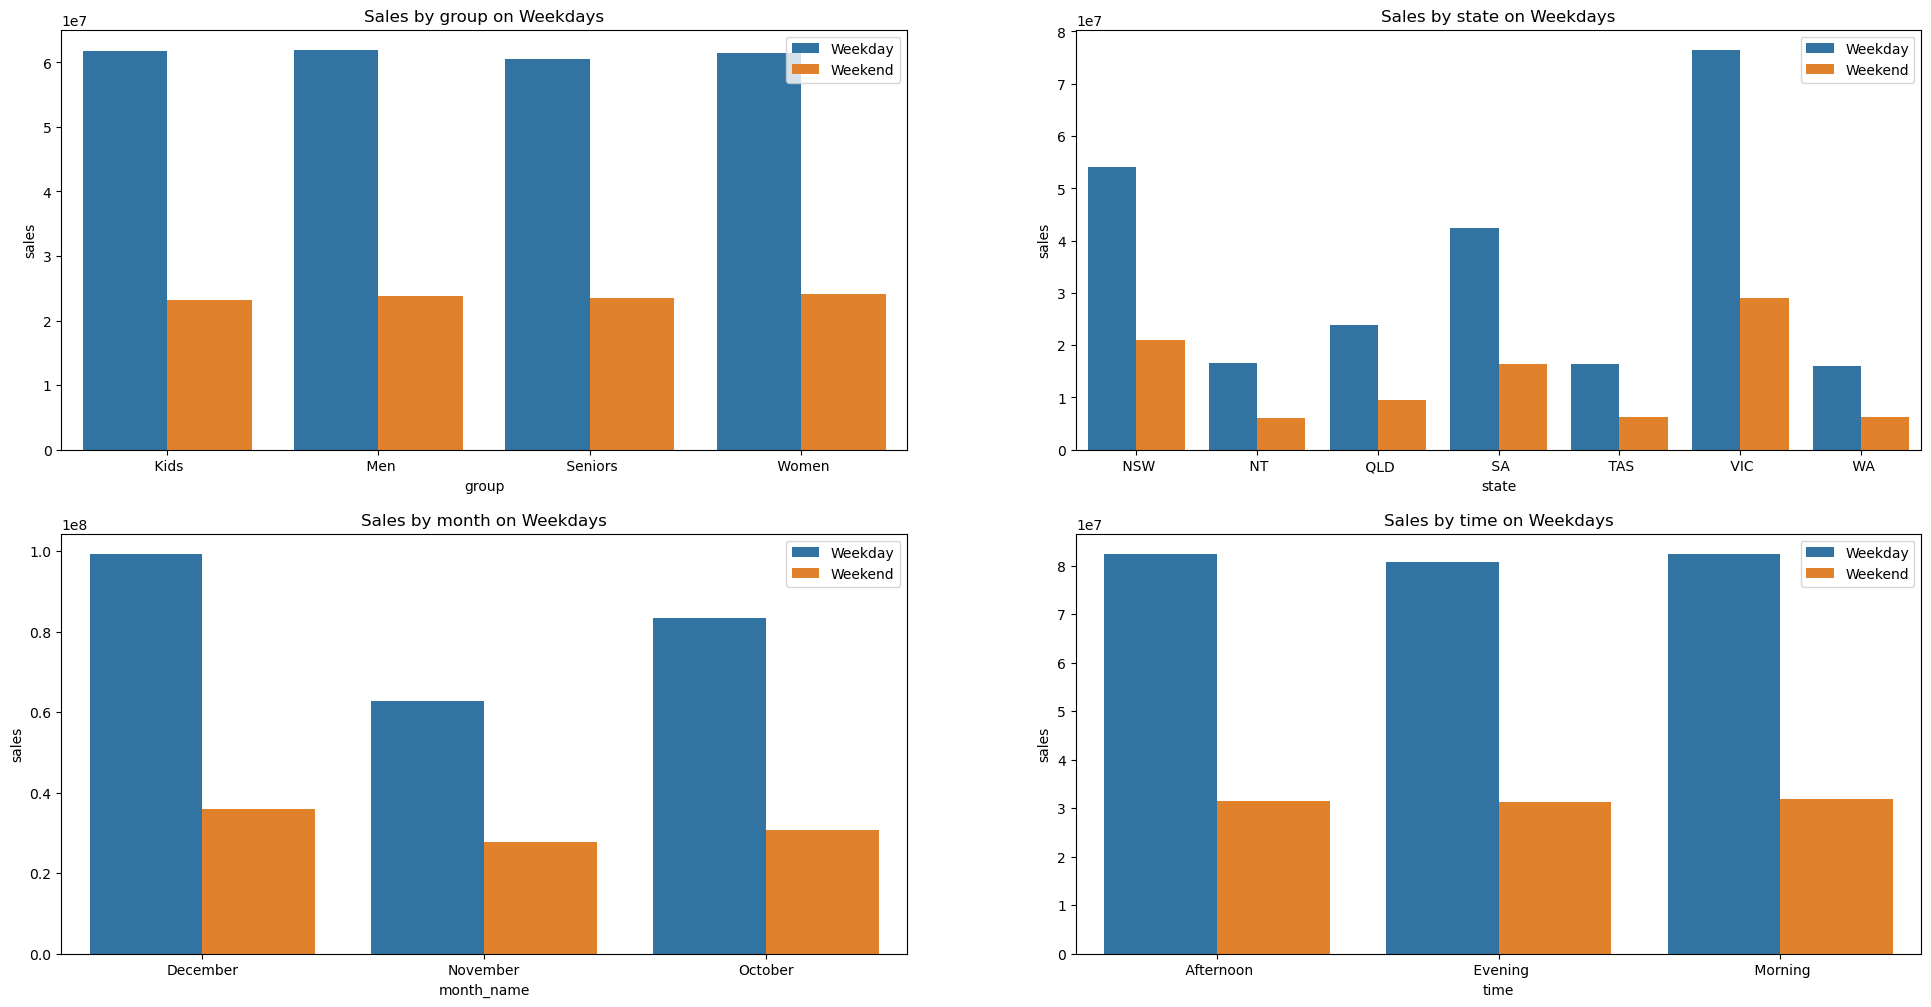

In [274]:
plt.subplots(2,2, figsize = (24,12))

plt.subplot(2,2,1)
group_vs_weekday = pd.crosstab(index=[df['Weekday(y/n)'],df['group']], columns='sales', values=df['sales'], aggfunc='sum').reset_index()
sns.barplot(data = group_vs_weekday, x = 'group', y = 'sales', hue = 'Weekday(y/n)')
plt.title("Sales by group on Weekdays")
plt.legend(loc = 'best')

plt.subplot(2,2,2)
state_vs_weekday = pd.crosstab(index=[df['Weekday(y/n)'],df['state']], columns='sales', values=df['sales'], aggfunc='sum').reset_index()
sns.barplot(data = state_vs_weekday, x = 'state', y = 'sales', hue = 'Weekday(y/n)')
plt.title("Sales by state on Weekdays")
plt.legend(loc = 'best')

plt.subplot(2,2,3)
month_vs_weekday = pd.crosstab(index=[df['Weekday(y/n)'],df['month_name']], columns='sales', values=df['sales'], aggfunc='sum').reset_index()
sns.barplot(data = month_vs_weekday, x = 'month_name', y = 'sales', hue = 'Weekday(y/n)')
plt.title("Sales by month on Weekdays")
plt.legend(loc = 'best')

plt.subplot(2,2,4)
time_vs_weekday = pd.crosstab(index=[df['Weekday(y/n)'],df['time']], columns='sales', values=df['sales'], aggfunc='sum').reset_index()
sns.barplot(data = time_vs_weekday, x = 'time', y = 'sales', hue = 'Weekday(y/n)')
plt.title("Sales by time on Weekdays")
plt.legend(loc = 'best')



plt.show()

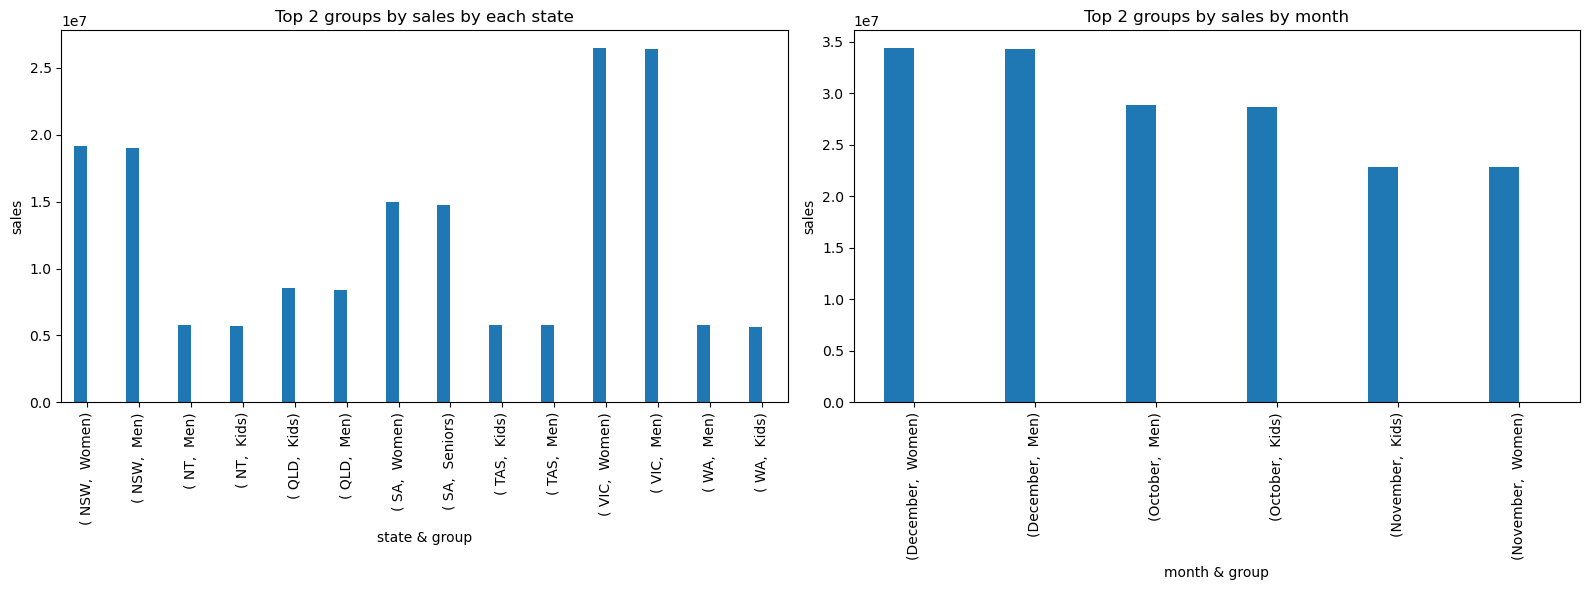

In [359]:
ct_group_vs_state = pd.crosstab(index = [df1['state'], df1['group']], columns = 'sales', values=df['sales'], aggfunc = 'sum')
ct_group_vs_state['sales_rank'] = ct_group_vs_state.groupby(level = 'state')['sales'].rank(ascending = False)
ct_group_vs_state = ct_group_vs_state.sort_values(by=['state', 'sales_rank'], ascending=[True, True])
ct_group_vs_state = ct_group_vs_state[ct_group_vs_state['sales_rank'] <=2]
ct_group_vs_state


ct_group_vs_month = pd.crosstab(index=[df1['month_name'], df1['group']], columns='sales', values = df1['sales'], aggfunc='sum')
ct_group_vs_month['rank'] = ct_group_vs_month.groupby(level='month_name')['sales'].rank(ascending = False)
ct_group_vs_month = ct_group_vs_month.sort_values(by = ['sales','rank'], ascending=[False, False])
ct_group_vs_month = ct_group_vs_month[ct_group_vs_month['rank'] <=2]


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ct_group_vs_state.plot(kind = 'bar', ax = axes[0],legend = False)
axes[0].set_title("Top 2 groups by sales by each state")
axes[0].set_xlabel("state & group")
axes[0].set_ylabel("sales")


ct_group_vs_month.plot(kind = 'bar', ax = axes[1],legend = False)
axes[1].set_title("Top 2 groups by sales by month")
axes[1].set_xlabel("month & group")
axes[1].set_ylabel("sales")



plt.tight_layout()
plt.show()

## Numerical to Numerical

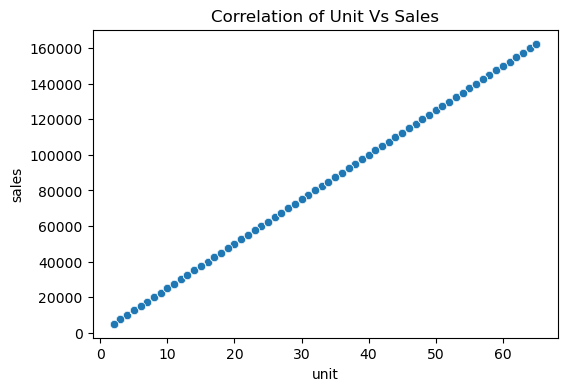

In [219]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df1, x = 'unit' , y = 'sales')
plt.title("Correlation of Unit Vs Sales")

plt.show()